In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm
import sys
import os

sys.path.append(os.path.abspath('/Users/engchongyock/Desktop/XCPatchTST'))
from config import get_config
from utils.helper import create_crosschannel_patchtst
from data.data_loader import create_dataloader
from utils.train import train

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else ('mps' if torch.backends.mps.is_available() else 'cpu')
config = get_config()
print(f'Device: {device}')
print(config)

Device: mps
{'seq_len': 64, 'pred_len': 1, 'batch_size': 8, 'stride': 4, 'patch_size': 8, 'd_model': 128, 'kernel_size': 3, 'tickers': ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'NVDA', 'META'], 'raw_dataset_dir': 'data/raw', 'processed_dataset_dir': 'data/processed', 'ticker_threshold': 4000, 'dataset_dir': '/Users/engchongyock/Desktop/XCPatchTST/data/dataset/dataset_2025-03-14.csv'}


In [3]:
in_channels = pd.read_csv(config['dataset_dir']).shape[1]

In [4]:
cross_channel_patchtst_model = create_crosschannel_patchtst(
                                device=device, 
                                in_channels=in_channels, 
                                pred_len=config['pred_len'], 
                                patch_size=config['patch_size'], 
                                stride=config['stride'], 
                                d_model=config['d_model'], 
                                kernel_size=config['kernel_size'],
                                )

[INFO] Created Cross-Channel PatchTST model with the following parameters:
       - in_channels: 61
       - pred_len: 1
       - patch_size: 8
       - stride: 4
       - d_model: 128
       - kernel_size: 3


In [5]:
optimizer = optim.Adam(cross_channel_patchtst_model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

In [6]:
df = pd.read_csv(config['dataset_dir'])
df

,Date,AMZN_Adjusted Close,AMZN_EMA,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Effective_Fed_Rate,AMZN_MACD,AMZN_MACD_Signal,...,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,NVDA_Effective_Fed_Rate,NVDA_MACD,NVDA_MACD_Signal,NVDA_MACD_Hist,NVDA_RSI,NVDA_SMA
0,2025-03-12,198.8900,203.7350,1.09111,1.09314,1.08754,1.08857,4.33,-8.0875,-6.2886,...,1.09111,1.09314,1.08754,1.08857,4.33,-5.9593,-4.1529,-1.8064,42.1388,116.0455
1,2025-03-11,196.5900,204.4050,1.08345,1.09472,1.08305,1.09110,4.33,-8.2563,-5.8388,...,1.08345,1.09472,1.08305,1.09110,4.33,-6.0968,-3.7013,-2.3955,32.2185,117.6308
2,2025-03-10,194.5400,206.7394,1.08392,1.08747,1.08048,1.08340,4.33,-7.6573,-5.2345,...,1.08392,1.08747,1.08048,1.08340,4.33,-5.4568,-3.1024,-2.3544,34.3807,119.9296
3,2025-03-07,199.2500,209.2149,1.07820,1.08888,1.07768,1.08300,4.33,-6.9544,-4.6288,...,1.07820,1.08888,1.07768,1.08300,4.33,-4.8568,-2.5138,-2.3430,35.3718,122.5954
4,2025-03-06,200.7000,211.3759,1.07864,1.08537,1.07655,1.07818,4.33,-6.3522,-4.0474,...,1.07864,1.08537,1.07655,1.07818,4.33,-4.1578,-1.9281,-2.2297,36.9928,125.4742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,2006-01-20,2.1960,2.2529,1.20940,1.21390,1.20380,1.21360,4.24,-0.0489,-0.0284,...,1.20940,1.21390,1.20380,1.21360,4.24,0.0142,0.0114,0.0028,75.7180,0.3233
4815,2006-01-19,2.2225,2.2621,1.21090,1.21240,1.20510,1.20960,4.23,-0.0473,-0.0233,...,1.21090,1.21240,1.20510,1.20960,4.23,0.0127,0.0107,0.0020,69.8264,0.3188
4816,2006-01-18,2.2160,2.2704,1.21010,1.21580,1.20680,1.21130,4.24,-0.0459,-0.0173,...,1.21010,1.21580,1.20680,1.21130,4.24,0.0121,0.0102,0.0019,60.2690,0.3152
4817,2006-01-17,2.2000,2.2950,1.21240,1.21400,1.20480,1.21050,4.32,-0.0368,-0.0102,...,1.21240,1.21400,1.20480,1.21050,4.32,0.0127,0.0097,0.0030,65.5285,0.3118


In [7]:
dataloaders = create_dataloader(df, config)

In [8]:
results = train(model=cross_channel_patchtst_model, train_dataloader=dataloaders['train_dataloader'], 
                test_dataloader=dataloaders['test_dataloader'], 
                val_dataloader=dataloaders['val_dataloader'], 
                optimizer=optimizer, 
                loss_fn=loss_fn, 
                epochs=1, 
                device=device)

100%|██████████| 1/1 [01:19<00:00, 79.67s/it]

Epoch: 1 | Train Loss: 28.326 | Train SMAPE: 38.069 | Train MAE: 2.003 | Train MSE: 28.325 | Train R2: 0.988 | Test Loss: 26.986 | Test SMAPE: 38.440 | Test MAE: 1.941 | Test MSE: 26.879 | Test R2: 0.988
Model saved to /Users/engchongyock/Desktop/XCPatchTST/models/saved_models/model_2025-03-14_16-36-14.pth


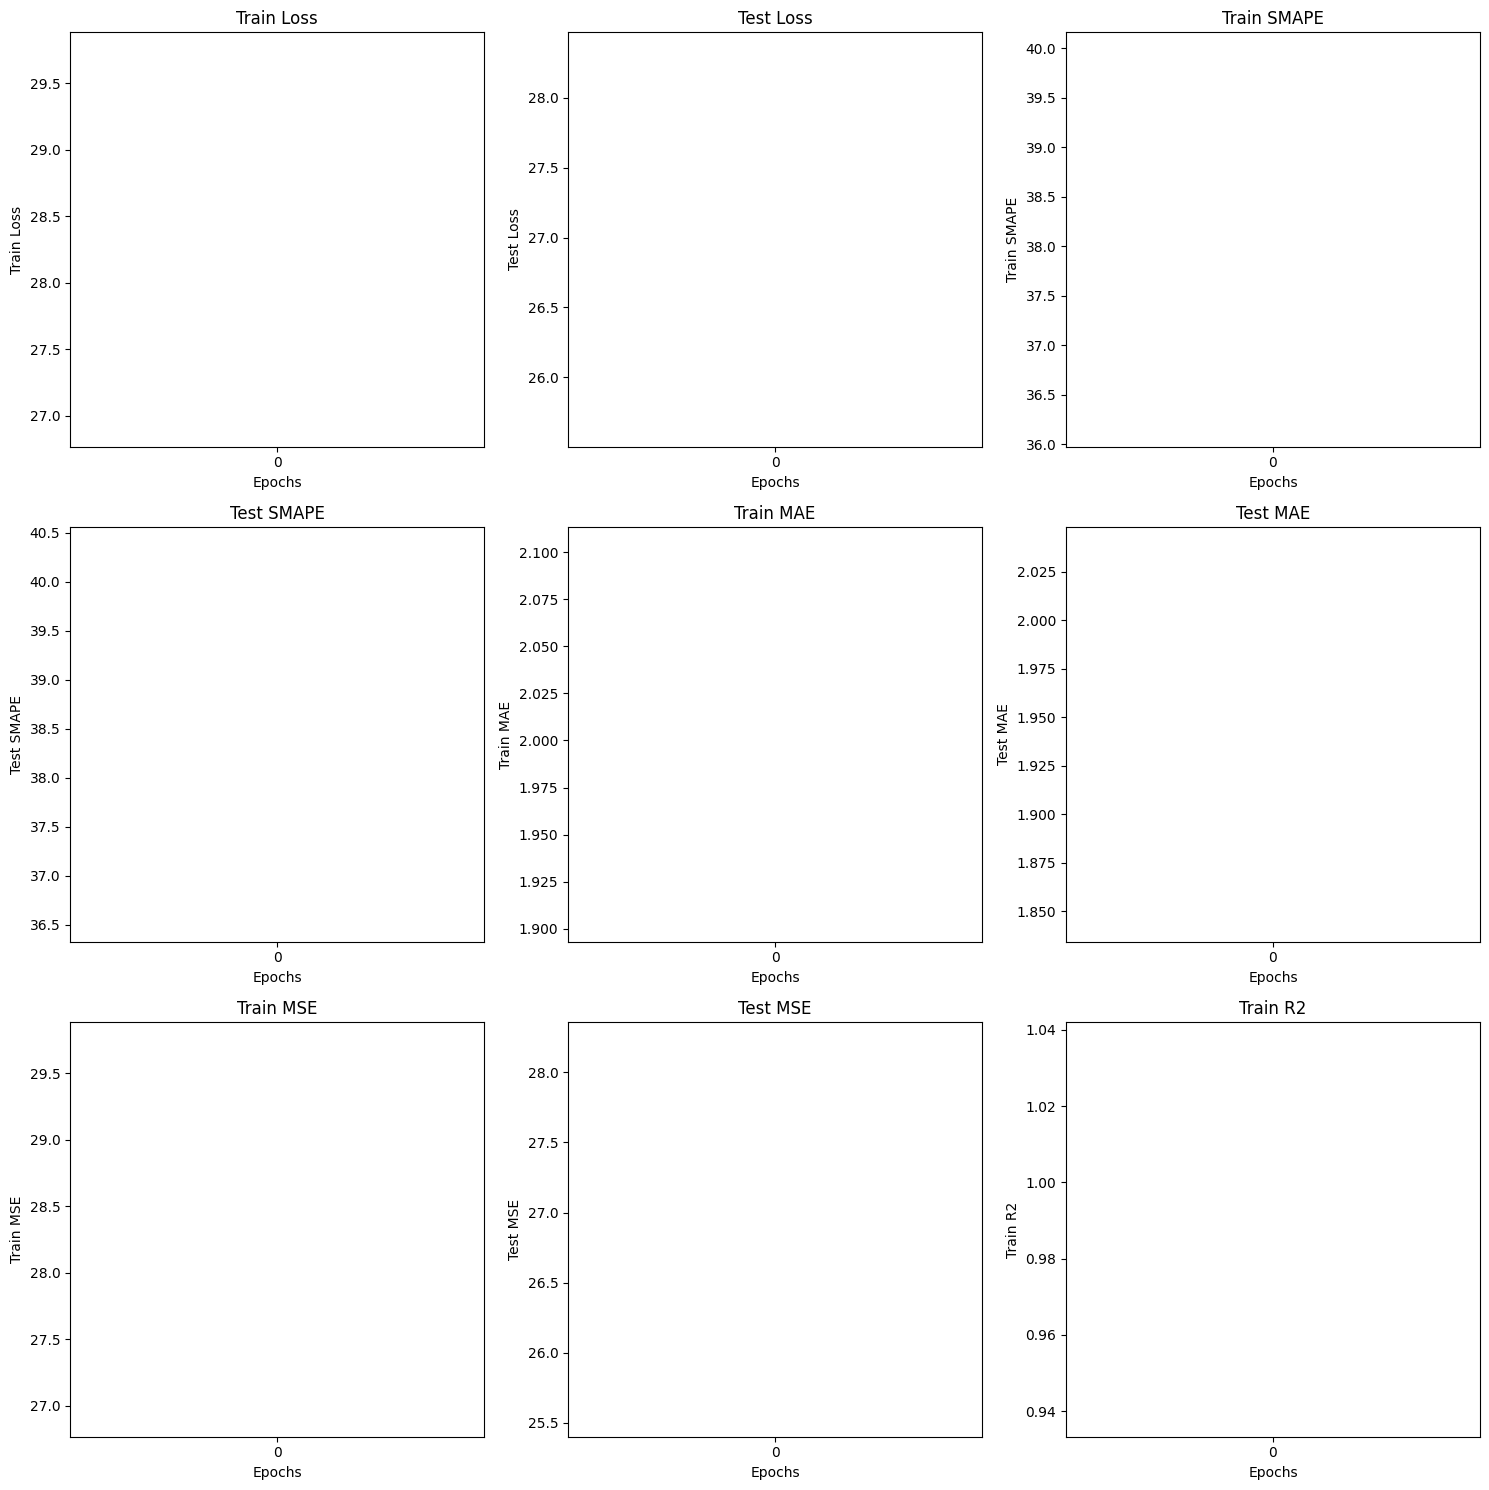

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Titles for each subplot
titles = [
    'Train Loss', 'Test Loss', 'Train SMAPE',
    'Test SMAPE', 'Train MAE', 'Test MAE',
    'Train MSE', 'Test MSE', 'Train R2'
]

# Data for plotting
data = [
    results['train_loss'], results['test_loss'], results['train_smape'],
    results['test_smape'], results['train_mae'], results['test_mae'],
    results['train_mse'], results['test_mse'], results['train_r2']
]

# Plot each metric
for i, ax in enumerate(axes):
    ax.plot(data[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Epochs')
    ax.set_ylabel(titles[i])
    ax.set_xticks(range(len(data[i])))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()